In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [0]:
#Importing the dataset :
mnist = tf.keras.datasets.mnist

In [0]:
#Splitting the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [9]:
#Checking dimensions :
print("Shape of x_train",x_train.shape)
print("Shape of x_test",x_test.shape)
print("Shape of y_train",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train (60000, 28, 28)
Shape of x_test (10000, 28, 28)
Shape of y_train (60000,)
Shape of y_test (10000,)


In [8]:
#Normalize using utils
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
print("Normalised x_train",x_train)

Normalised x_train [[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 

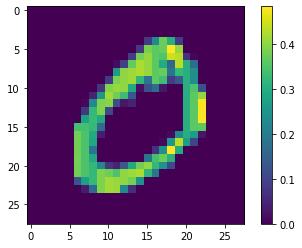

In [12]:
#Checking the dataset
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

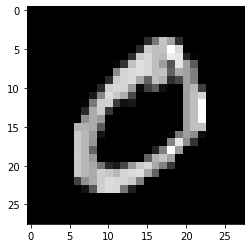

In [15]:
plt.imshow(x_train[1].reshape(28,28),cmap='gist_gray')

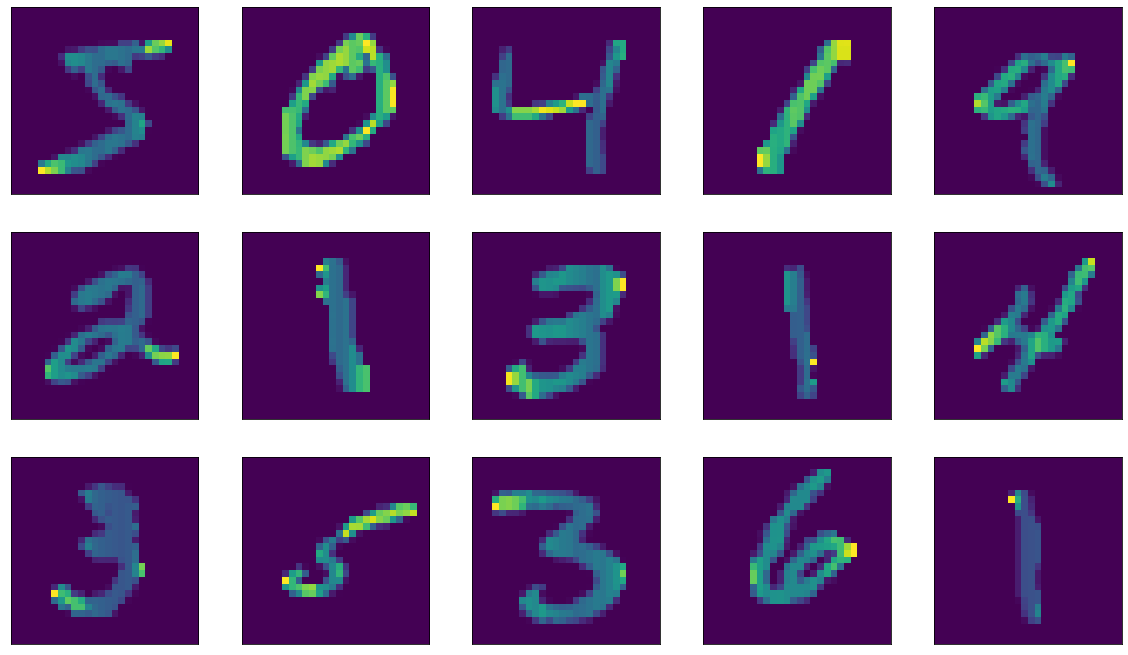

In [17]:
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

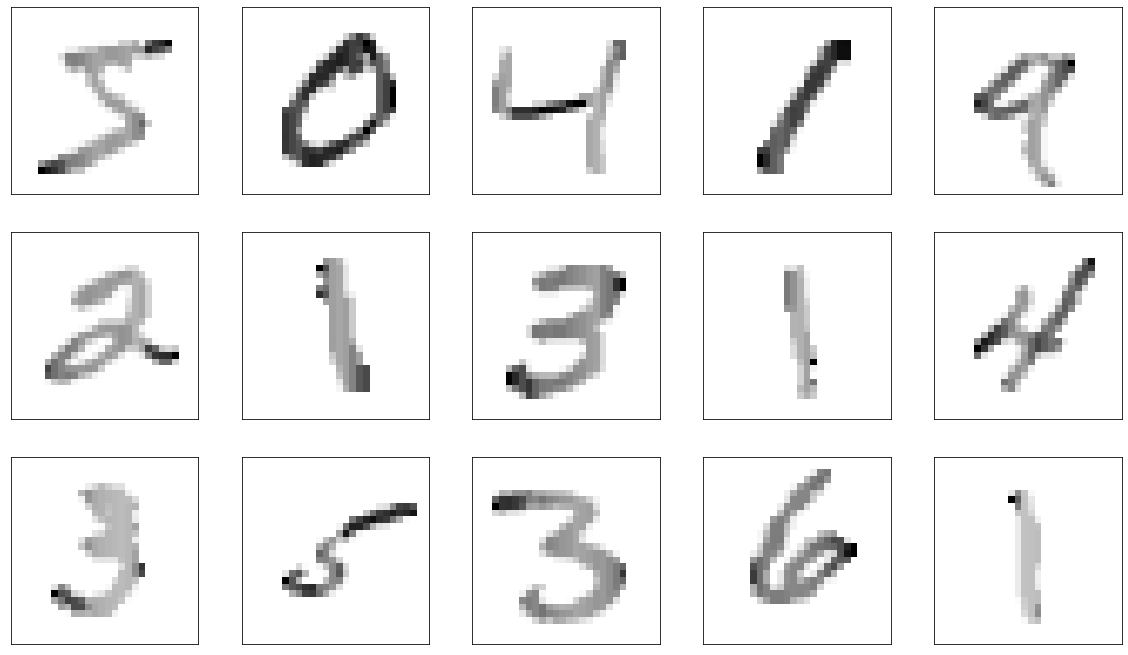

In [19]:
plt.figure(figsize=(20,20))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap = plt.cm.binary)
plt.show()

In [0]:
#Creating the model

from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = 'accuracy')

callback=EarlyStopping(monitor='val_loss',patience = 3,verbose=0,mode='min')

In [22]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,callbacks=[callback],epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.3499 - accuracy: 0.8921 - val_loss: 0.1486 - val_accuracy: 0.9551
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1284 - accuracy: 0.9594 - val_loss: 0.1158 - val_accuracy: 0.9663
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0877 - accuracy: 0.9724 - val_loss: 0.1083 - val_accuracy: 0.9658
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0675 - accuracy: 0.9788 - val_loss: 0.1007 - val_accuracy: 0.9704
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0566 - accuracy: 0.9817 - val_loss: 0.0943 - val_accuracy: 0.9723
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.1198 - val_accuracy: 0.9671
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.1224 - val_accuracy: 0.9672
Epoch 

In [23]:
import pandas as pd
loss = pd.DataFrame(model.history.history)
loss.head

<bound method NDFrame.head of        loss  accuracy  val_loss  val_accuracy
0  0.349907  0.892117  0.148613        0.9551
1  0.128421  0.959417  0.115787        0.9663
2  0.087671  0.972367  0.108332        0.9658
3  0.067503  0.978783  0.100673        0.9704
4  0.056565  0.981717  0.094256        0.9723
5  0.043237  0.986150  0.119812        0.9671
6  0.036176  0.988150  0.122433        0.9672
7  0.033782  0.988467  0.101923        0.9722>

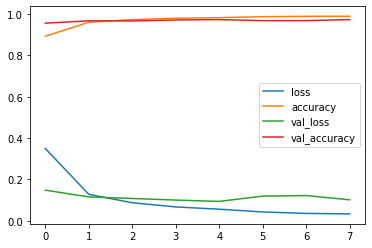

In [24]:
#Checking the loss
loss.plot()

In [25]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.1019 - accuracy: 0.9722


[0.10192269086837769, 0.9721999764442444]

In [28]:
predictions = model(x_train[:1]).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.



1.4611508

In [31]:
#Checking the model output 

pred = model.predict(x_test)

import numpy as np
print(np.argmax(pred[123]))

6


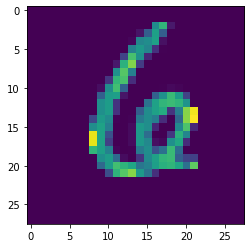

In [32]:
plt.imshow(x_test[123])
plt.show()

In [33]:
#Saving the model
model.save("num_reader.model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: num_reader.model/assets
